<a id="top"></a>

# Prediction of Heart Disease in Patients using Machine Learning

The following notebooks is a collection of code, methodologies and several approaches in a attempt to develope a prediction algorithm, also refered through the notebook as *estimator* or *model*, using Machine Learning.

This is a personal project, created with educational purposes, doesn't not have any valid medical approval, and should only be of interest by it's coding/developemnt of algorithm.


The baseline development of the project will be divided in the following steps:

1. [Problem Definition](#problem-definition)
2. [Data](#data)
3. [Evaluation of the Model](#evaluation)
4. [Features](#features)
4. [Tools (Libraries) Setup](#tools)
4. [Exploratory Data Analysis](#eda) <br>
    6.1 [Loading External Dataset](#data-loading)<br>
    6.2 [Statistically Numerical & Graphical Exploration](#data-analysis)<br>
5. [Modeling (Development of algorithm)](#modiling)<br>
    7.1 [Baseline Models](#baseline-models)<br>
    7.2 [Model Improvement](#model-improvement)<br>
    7.3 [Model's Performance Measurement](#model-performance)<br>
6. Experimentation

This first couple of sectons are mostly theoricals, since most of the Machine Learning development is done in the experimentation phase, we will first make an exploratory analysis, and futher enhancement of the baseline model will be creted.

By last, we the model fulfills the requeriments established in part 3. Evaluation of the Model, a one step model will be created, to encapsulate the experimentation done, and the model will be serialized (saved) for future use.

---
<a id="problem-definition"></a>
## 1. Problem Definition

Quote with the technical description

To know exactly what we will be doing, we first define the problem that we are tring to solve, how we will attempt to do so, and with what tools.

Definition:

>  Based on clinical related parameters for a particular patient, like cholesterol level or insuline in the blood, to say a few, how aim to predict if the given patient is likely to have a heart disease, or not.

Making medical exmans and analysing them, doctors easily know if a given patient have some kind of heart disease, the patterns are obviuos, and most of the heart diseases have roughly the same impact in those medical examans.

The goal of this project is to create a model, that only needs the result of these examns, we summit them into a computer, and give back whether a patient have, or not, a heart disease. 

In Statistical terms, this is a Binary Classification problem, since we want to predict if the patient is part of one category, or another (2 categories, expressed in 1, or 0, thus, the name *binary* in the classification).

<a id="data"></a>
## 2. Data

For the development of this project, as any Machine Learning project, we need Data, the more the better, because analysing and finding patterns inside that data is the basis of any prediction algorithm.

For our purposes, we will take a heart disease dataset, taken out of the [Cleveland UCI Machine Learning Repository](archive.ics.uci.edu/ml/datasets/heart+Disease), where we can find a raw version of the one used here. The .csv version that will be used is taken out of [this Kaggle Page](kaggle.com/tonift/heart-disease-uci).

An in deep explanation of the dataset (what all this data is about, and from where it comes from) can be found in those links (*hint*: starts with Kaggle).

**Disclaimer:** The data it's opensource, finded in public repository where everybody can access for free, more information and projects about the same subject can be found online.

<a id="evaluation"></a>
## 3. Evaluation

Becuase of the nature of this project, we must ensure the project looks promising on it's proof of concept (starting point, early stage of the project where we check if it's whorth investing more time and money on it) stage, hence:

> If we can get a 95% of accuracy at predicting whether a patient has or not a heart disease, we can label the project as a success and pursue a more accurate version.

## Features <a id="features"></a>

**Feature Dictionary**

Here you can quickly find what the features are about, and what theit classification means.

<span style="font-size: small">Featues is the Machine Learning way to say, a *particular data value* that represents some *attribute* of the patient recorded, generalized to every patient on the dataset.</span>


* Sex
    * 1 = Male, 0 = Female


* Fasting Blood Sugar > 120 dg/dl
    * 1 = True, 0 = False


* Exercise Induced Angina
    * 1 = True, 0 = False
    
    
* Chest Pain Type:
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
<br>


* Resting Blood Preasure
    - (in mm Hg on admission to the hospital)
<br>


* ST depression
    - ST depression induced by exercise relative to rest
<br>


* Slope
    - The slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
<br>


* Number of Major Vessels
    - (0-3) colored by flourosopy
<br>


* THAL
    * 3 -> normal
    - 6 -> fixed defect
    - 7 -> reversable defect
    
*The cells belove in a dictionary of what the columns means (fullname), the text above is extra information about certain labels*

## Tools Setup <a id="tools"></a>

Python will be used as the programming language where **all** the code will be written. Hence, we will use the following libraries:

For the Exploratory Data Analysis section of the project (EDA):

* Numpy
* Pandas


As the main plotting libraries:

* Matplotlib
* Seaborn


Where the whole machine learning functions and models are:
* ScikitLearn


Due to the Classification nature of the problem, and the official guide of Scikit Learn for choosing an estimator, only 3 types of classifier estimator where imported.

Futhermore, we imported the basic metrics for evaluating the performance of a classification type estimator.

In [1]:
# Configuration

# EDA / Plotting

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Print the plots in the notebook

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation of models' performance function
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

plt.style.use("seaborn-talk")

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Exploratory Data Analysis <a id="eda"></a>

The main goal of this section is to become Subject Matter Expert of the dataset, i.e., become ourselves familiar with the dataset, what the featues means, how they affect the samples, the shape, form, data type and distribution of our data set, as the subgroups, tendencies, etc. This is a really important aspect of the project, since this data is the foundation of our model, if the data is poorly preprocessed, our model will fail.

We will primary rely on visual methods to explaing the data set, applying statistical concept of descriptive statistic, we will make conclusions about the given dataset.


Futhermore, we will try to answer:

* What are we trying to solve?
* What kind of data do we have? and how the differ from one another? 
* What's missing in the dataset? and how can be deal with that?
* Where, and how are the outliers? and how we will treat them?
* What feature can we add, create or remove, to improve our dataset?

### Loading the dataset <a id='data-loading'></a>

In [3]:
heart_disease_raw = pd.read_csv("data/heart-disease.csv")
heart_disease_raw  # Shoe the first 5 and last 5 samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
print(f"Our dataset contains {heart_disease_raw.shape[0]} samples.\n")
print(f"Each sample contains {heart_disease_raw.shape[1]} features.")
print('This also can be seen in the shape of the Matrix above.')

Our dataset contains 303 samples.

Each sample contains 14 features.
This also can be seen in the shape of the Matrix above.


In [5]:
# And there's no missing values! That's nice
heart_disease_raw.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Human Friendly Version

To better understand the dataset, the labels and values will be changed, so that our plots are more meaningful and thus, can be undestood by anyone.

In [6]:
new_labels = {   # Change the encoded version of the feature names
    "age": "Age",
    "sex": "Sex",
    "cp": "Chest Pain Type", # Check Extra Info Section
    "trestbps": "Resting Blood Pressure (mm Hg)",
    "chol": "Serum Cholestoral (mg/dl)",
    "fbs": "FBS > 120 dg/dl",
    'restecg': "Resting Electrocardiographic Results", 
    'thalach': "Maximum Heart Rate Achieved",
    'exang': "Exercise Induced Angina", 
    'oldpeak': "ST Depression", 
    'slope': "Slope", 
    'ca': "Number of Major Vessels", 
    'thal': "THAL", 
    'target': "Target"    
}

sex_class = {
    1: "Male",
    0: "Female"
}

exercise_angina = {
    1: "Yes",
    0: "No"
}

fbs_values = {
    1: "Yes",
    0: "No"
}

target_label = {
    1: "Positive",
    0: "Negative"
}

#Replacements
heart_disease = heart_disease_raw.rename(columns = new_labels) # Return the copy
heart_disease["Sex"].replace(sex_class, inplace=True)
heart_disease["Exercise Induced Angina"].replace(exercise_angina, inplace=True)
heart_disease["FBS > 120 dg/dl"].replace(fbs_values, inplace=True)
heart_disease["Target"].replace(target_label, inplace=True)
heart_disease.head()

heart_disease.to_csv('data/heart-disease-hf.csv')  # Save for future use
# hf stands fot human friendly

,Age,Sex,Chest Pain Type,Resting Blood Pressure (mm Hg),Serum Cholestoral (mg/dl),FBS > 120 dg/dl,Resting Electrocardiographic Results,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,THAL,Target
0,63,Male,3,145,233,Yes,0,150,No,2.3,0,0,1,Positive
1,37,Male,2,130,250,No,1,187,No,3.5,0,0,2,Positive
2,41,Female,1,130,204,No,0,172,No,1.4,2,0,2,Positive
3,56,Male,1,120,236,No,1,178,No,0.8,2,0,2,Positive
4,57,Female,0,120,354,No,1,163,Yes,0.6,2,0,2,Positive


In [7]:
heart_disease.info()    # Same Memory Space, new data type added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   303 non-null    int64  
 1   Sex                                   303 non-null    object 
 2   Chest Pain Type                       303 non-null    int64  
 3   Resting Blood Pressure (mm Hg)        303 non-null    int64  
 4   Serum Cholestoral (mg/dl)             303 non-null    int64  
 5   FBS > 120 dg/dl                       303 non-null    object 
 6   Resting Electrocardiographic Results  303 non-null    int64  
 7   Maximum Heart Rate Achieved           303 non-null    int64  
 8   Exercise Induced Angina               303 non-null    object 
 9   ST Depression                         303 non-null    float64
 10  Slope                                 303 non-null    int64  
 11  Number of Major Ves

### Statistically Numerical Exploration <a id='data-analysis'></a>

In this section, a statistical analysis will be performed on the data set, to evaluate the numerical aspect of the data set, and get more insight about patterns, tendencies, and what to plot in the Graphical Section, to further evaluate the data.

The statistical analysis will be performed by Python, since the data is inside a DataFrame, a Panas object, Pandas allow us to perform mathematical ops using Numpy, both libraries imported in the configuration section.


As can be seen, most of the features are classified, either Yes or No, or in some range, like Chest Pain Type, that goes from 1 to 4. This ranged values can be analysed using Central Tendency Measurements.

Futhermore, we can also peform this analysis on 3 features, Age, Resting Blood Pressure, and Serum Cholestoral, this values do are continous, just as the clasified one.

Each feature will be analysed on its own, them, in the graphical section, we might see the patters among multiple features.

---

## Central Tendency Values

To keep this notebook DRY, we will create a function to plot the very basic statistical metrics that are always used to describe the distribution of the data.

In [8]:
def basic_metrics(label, print_label):
    
    """
    Basic Function to print central tendency metrics from any label passed.
    The heart_disease name for the data is assumed.
    
        @params
            label: Name of the column to evaluate
            print_label: Name of the column, formated to print.
    """
    print("Average", print_label, "of the Patients:", heart_disease[label].mean().astype(np.float16))
    print("Most Frequently", print_label, "of Patients:", heart_disease[label].median())
    print("Variance of the samples:", heart_disease[label].var().astype(np.float16))
    print("Standar Deviation of Samples from the Mean:", heart_disease[label].std().astype(np.float16))
    print()
    print("Minimun", print_label, ":", heart_disease[label].min())
    print("Max", print_label, ":", heart_disease[label].max())

#### Age

In [9]:
basic_metrics("Age", "Age")

Average Age of the Patients: 54.38
Most Frequently Age of Patients: 55.0
Variance of the samples: 82.5
Standar Deviation of Samples from the Mean: 9.086

Minimun Age : 29
Max Age : 77


The metrics above show us a really small data distribution, with only approx. 9 year of difference between samples, the sample presents a relatively normal distribution.

Futhermore, the most common age is 55, which is the age when heart problems start to be a serious problem. Futher investigation can lead to patterns in the age and target feature.

----

### **Resting Blood Pressure** (measured in mm Hg)

In [10]:
basic_metrics("Resting Blood Pressure (mm Hg)", "Blood Pressure")

Average Blood Pressure of the Patients: 131.6
Most Frequently Blood Pressure of Patients: 130.0
Variance of the samples: 307.5
Standar Deviation of Samples from the Mean: 17.53

Minimun Blood Pressure : 94
Max Blood Pressure : 200


In contrast, the Resting Blood Pressure presents a more elevated Variance and Standar Variation, although the average and median are pretty close together. Extreme values (min/max) are far away from each others.

---

### **Serum Cholestoral** (measured in mg/dl)

In [11]:
basic_metrics("Serum Cholestoral (mg/dl)", "Serum Cholestoral")

Average Serum Cholestoral of the Patients: 246.2
Most Frequently Serum Cholestoral of Patients: 240.0
Variance of the samples: 2686.0
Standar Deviation of Samples from the Mean: 51.84

Minimun Serum Cholestoral : 126
Max Serum Cholestoral : 564


In [12]:
heart_disease['Target'].value_counts()

Positive    165
Negative    138
Name: Target, dtype: int64

Before the real analysis, just by checking the distribution of the 'Target' variable. we can find that the dataset is balanced, and thus, the statistical analysis ahead must take this into consideration.

### Graphical Description

The graphs above are means to explain the distribution of our data inside the dataset, thus, every feature is plotted individually.

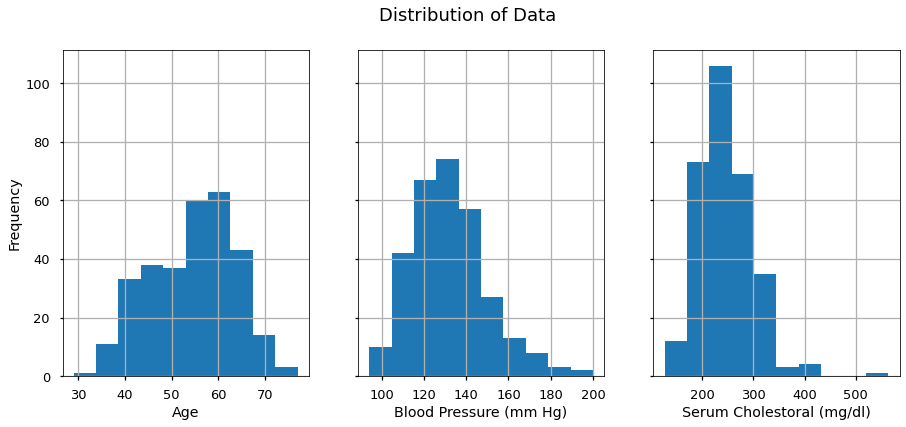

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

fig.suptitle("Distribution of Data", fontsize=18)

heart_disease["Age"].hist(ax=ax[0]);
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Frequency")

heart_disease["Resting Blood Pressure (mm Hg)"].hist(ax=ax[1])
ax[1].set_xlabel("Blood Pressure (mm Hg)")

heart_disease["Serum Cholestoral (mg/dl)"].hist(ax=ax[2]);
ax[2].set_xlabel("Serum Cholestoral (mg/dl)");

The graphs above show us the distribution of the continous, i.e, the non-categorical features of the dataset, the categorical features are going to be ploted agains the target variable to get more insight.

Age shows a normal distibution, most of the samples have an age of 54, with +-9 years of difference among patients. The most important insigth, is that this dataset won't be usefull for too young or too old patients, the near the patient age is 54, the better.

The Blood Preassure and Surm Cholesterol aren't a normal distribution, but the mayority of the samples are mostly concentrated in the mean, not the media.

Thus, the median do is a good metric for the average patient in the dataset.

Futher analysis of this variablesa again others are needed to truly find a pattern.

## Classification Distribution <a id="distribution"></a>


The distribution of the Features that are classified, will be displayed, using Bar Plots.

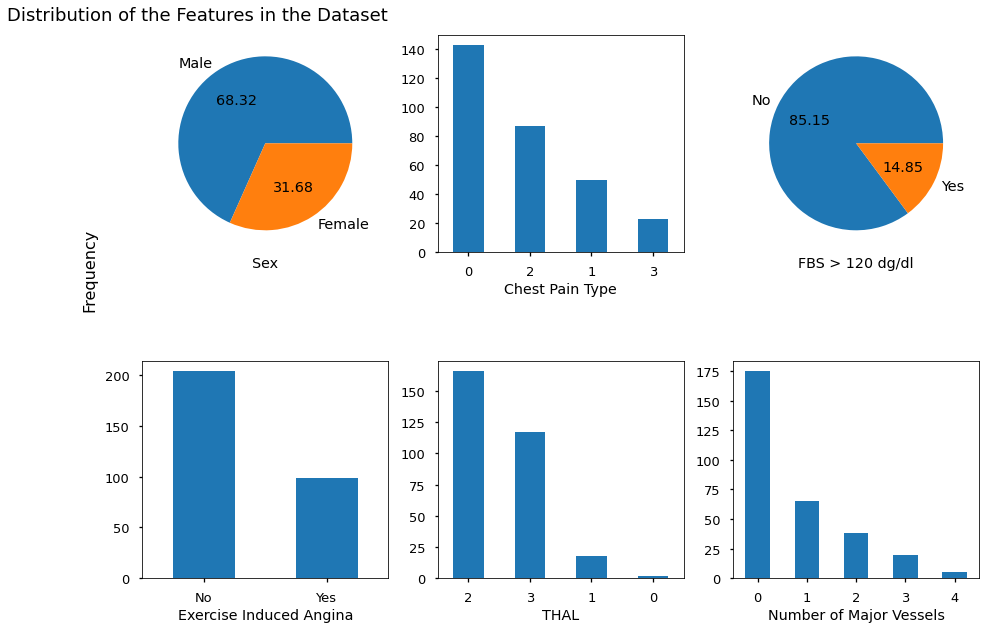

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

fig.text(0.07, 0.5, "Frequency", rotation="vertical", fontsize=16)
fig.text(0, 0.9, "Distribution of the Features in the Dataset", fontsize=18)
fig.subplots_adjust(hspace=0.5)

pd.value_counts(heart_disease["Sex"]).plot(ax=ax[0,0], kind="pie", autopct='%.2f', 
                                          fontsize='x-large');
ax[0, 0].set_xlabel("Sex")
ax[0, 0].set_ylabel("")

pd.value_counts(heart_disease["Chest Pain Type"]).plot(ax=ax[0,1], kind="bar", rot=0);
ax[0, 1].set_xlabel("Chest Pain Type")

pd.value_counts(heart_disease["FBS > 120 dg/dl"]).plot(ax=ax[0,2], kind="pie",
                                                      autopct='%.2f', fontsize='x-large');
ax[0, 2].set_xlabel("FBS > 120 dg/dl")
ax[0, 2].set_ylabel("")

pd.value_counts(heart_disease["Exercise Induced Angina"]).plot(ax=ax[1,0], kind="bar", rot=0);
ax[1, 0].set_xlabel("Exercise Induced Angina")

pd.value_counts(heart_disease["THAL"]).plot(ax=ax[1,1], kind="bar", rot=0);
ax[1, 1].set_xlabel("THAL")

pd.value_counts(heart_disease["Number of Major Vessels"]).plot(ax=ax[1,2], kind="bar", rot=0)
ax[1, 2].set_xlabel("Number of Major Vessels");

All the conclusions are done considering that the max. samples are 303.

* Males represents 70% of the total amount of patients, thus, for any given patient, there's a probability of 70% of been a male. While only 30% of the patients are Female. 

* 82% of the patients have a FBS over 120 mg/dl, from the [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=Fasting%20blood%20sugar%20test.&text=A%20fasting%20blood%20sugar%20level,separate%20tests%2C%20you%20have%20diabetes.), 82% of the patients have some kind of diabetes. Since this is a balanced dataset, futher investigation of the correlation of this variable must be analysed.

* As a general, we can seed that all the categorical variables have some kind of dominand category, nevertheless, the rest of categories still represents a important % and can containt some kind of pattern among them.


Because of this, futher investigation of the correlation among the variables must be done before considering any feature undesirable, or jumping to any conclusion.

### Relationship Among Featurest

Panda's Crosstabs and Scatter Plots are the heart of this section.

The plots are aimed to show whether there's some kind of relationship among the features or not, and see if the model will be able to make a prediction out of it.

First, we will plot each of the main categorical features vs the Target.

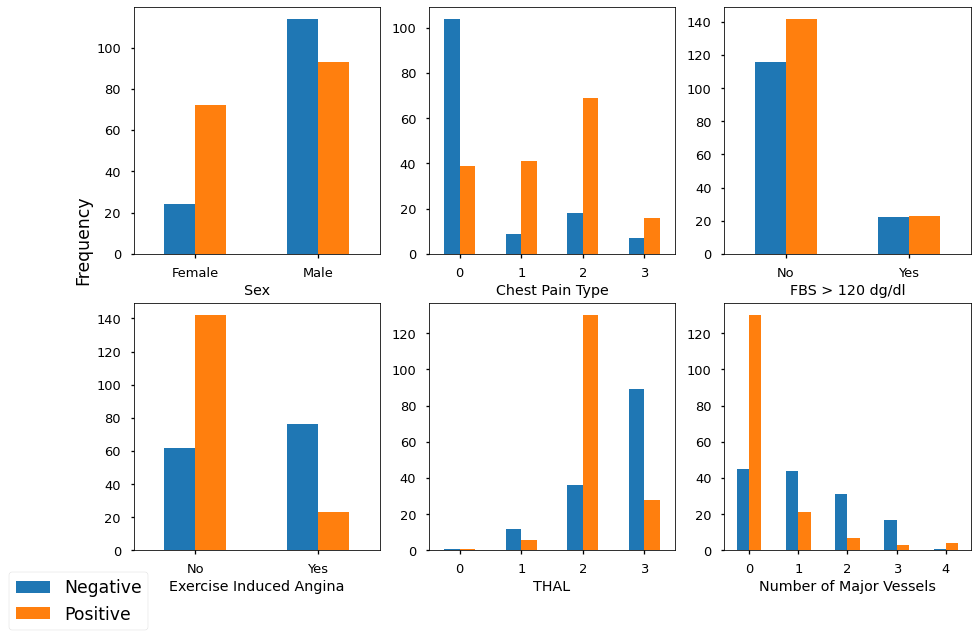

In [15]:
target_column = heart_disease['Target']

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

fig.text(0.07, 0.5, "Frequency", rotation="vertical", fontsize='xx-large')

pd.crosstab(heart_disease["Sex"], target_column).plot(ax=ax[0,0], kind="bar", rot=0, legend=None);
ax[0, 0].set_xlabel("Sex")

pd.crosstab(heart_disease["Chest Pain Type"], target_column).plot(ax=ax[0,1], kind="bar", rot=0, legend=None);
ax[0, 1].set_xlabel("Chest Pain Type")

pd.crosstab(heart_disease["FBS > 120 dg/dl"], target_column).plot(ax=ax[0,2], kind="bar", rot=0, legend=None);
ax[0, 2].set_xlabel("FBS > 120 dg/dl")


pd.crosstab(heart_disease["Exercise Induced Angina"], target_column).plot(ax=ax[1,0], kind="bar", rot=0, legend=None);
ax[1, 0].set_xlabel("Exercise Induced Angina")

pd.crosstab(heart_disease["THAL"], target_column).plot(ax=ax[1,1], kind="bar", rot=0, legend=None);
ax[1, 1].set_xlabel("THAL")

pd.crosstab(heart_disease["Number of Major Vessels"], target_column).plot(ax=ax[1,2], kind="bar", rot=0, legend=None)
ax[1, 2].set_xlabel("Number of Major Vessels");

handles, label = ax[1, 2].get_legend_handles_labels()
fig.legend(handles, label, loc='lower left', fontsize='xx-large');

*The cells belove are used to represent numerically the conclusions done from the graphs.*

* A significant amount of Females have a heart disease, although they represent 30% of the data, more then 50% of them have a heart disease.


* A significant amount of patients with a Chest Pain of class 0 (asymptomatic) don't have a heart disease, beside been a strong pattern, is a logic assumption.


* Since most of the patients in the dataset have a FBS over 120, the bars are higher, nevertheless, the distribution of the Target is more or less evenly, taken the lead the positive cases.


* Those who don't present a Exercise Induced Angina have a heart disease, 140 cases from 303, roughly 50% of the patients falls in this category, less frequenty but obvious, those how do have a Exercise Induced Angina, are negative to heart disease, the distintion is big among this 2 groups, and cleary represents a pattern.


* Same case for those who have THAL = 2 and 0 class in the Mayor Vessel Number feature, almost 50% of the positive cases falls in this category, strong pattern here.

In [16]:
heart_disease['Target'].value_counts()
pd.crosstab(heart_disease["Sex"], target_column)
pd.crosstab(heart_disease["FBS > 120 dg/dl"], target_column)

Positive    165
Negative    138
Name: Target, dtype: int64

Target,Negative,Positive
Sex,,
Female,24,72
Male,114,93


Target,Negative,Positive
FBS > 120 dg/dl,,
No,116,142
Yes,22,23


### Correlation Matrix

The Correlation Matrix will show the cofficient of correlation, how related and in what amount are each variable to one another, **including the Target feature.**

This matrix will futher support the graph above.

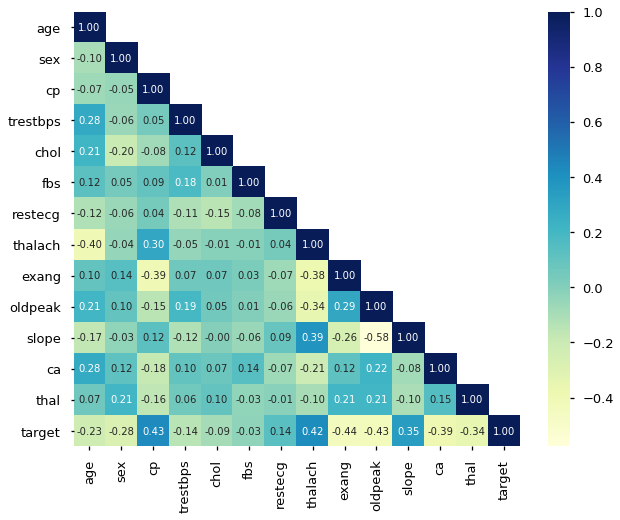

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

correlation_map = heart_disease_raw.corr()

mask = np.zeros_like(correlation_map)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False # Mask to hide to upper triangle

ax = sns.heatmap(correlation_map, annot=True, fmt='.2f', cmap='YlGnBu', mask=mask); 

Scatter Plot of 2 vars + target classification

thalach + exang
thalach + chest pain
sex + age

*The Correlation matrix shows the correlation coefficient among all the variables.*

The last row of the plot show the correlation among each feature and the target. The most correlated ones are:

* Chest Pain
* Maximum Heart Rate Achieved

This means, logically, the greather the Chest Pain and Heart Rate, the greather the chance of having a heart disease.

Negative Correlated are:

* Exercise Induced Angina by exercise
* ST depression induced by exercise

The lower, or the abscen of this feature, the more probability of having a heart disease.

This, and futher exploration of this correlation are shown below, and the relationship among feature vs target are shown in the graph bars above.

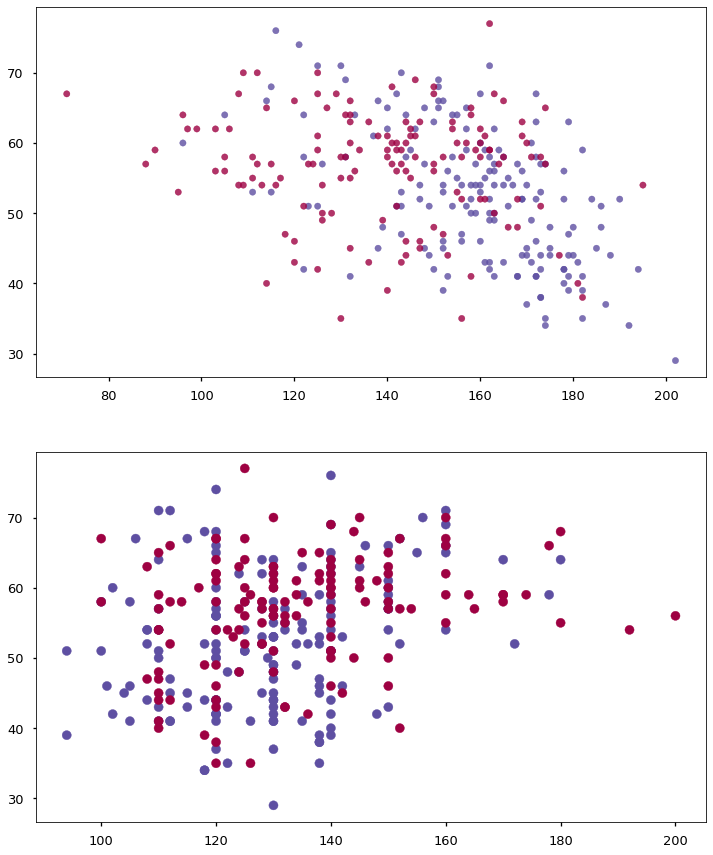

In [88]:
mask = heart_disease['Target'] == 'Yes'

fig, ax = plt.subplots(nrows=2, figsize=(12, 15))
ax[0].scatter(x=heart_disease_raw['thalach'], y=heart_disease_raw['age'],
              c=heart_disease_raw['target'], cmap='Spectral', alpha=0.8, s=40)


ax[1].scatter(x=heart_disease_raw['trestbps'], y=heart_disease_raw['age'],
             c=heart_disease_raw['target'], cmap='Spectral');

To better undestand the relationship (correlation) among all the features, the machine learning model is the easiest way.

## Modeling<a id="modeling"></a>

#### Preparing Data for the Machine Learning

In [90]:
X, y = heart_disease_raw.drop('target', axis=1), heart_disease_raw['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()
y_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2


68     1
278    0
294    0
248    0
165    0
Name: target, dtype: int64

Following the Scikit Learn Cheatsheet, 3 models will be used, here, listed from simple to complex:

1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForestClassifier

In [93]:
def train_n_score(models, X_train, X_test, y_train, y_test):
    """
    Train (fit) and Evaluate a set of machine learning models, passed inside a dict.
    The Key of the Dict will be the name of the given machine learning model, and thus
    referenced with that name in the output of this function.
    
    The model will be scored with the build in score function that comes inside the model.
    i.e:
    `model.score()`
    
    return:
        A dictionary, with the score of each model passed. Model referenced using the name
        passed in the dictionary.
    """
    
    np.random.seed(42)
    
    model_store = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)  # Train each model
        
        model_store[name] = model.score(X_test, y_test)
    
    return model_store # Return the dictionary with the score of the models

In [97]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000), # Avoid Converge Warning
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

{'Logistic Regression': 0.9180327868852459,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.9016393442622951}

### Model Comparison

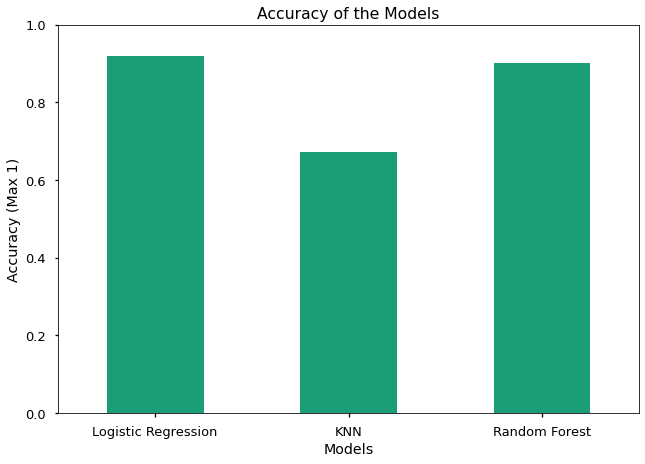

In [159]:
models_score = pd.DataFrame(train_n_score(models, X_train, X_test, y_train, y_test),
                           index=['Accuracy'])

ax = models_score.T.plot.bar(rot=0, xlabel='Models', ylabel='Accuracy (Max 1)',
                           colormap='Dark2', yticks=[0, 0.2, 0.4, 0.6, 0.8, 1],
                           title='Accuracy of the Models', legend=False);

In [129]:
models_score

,Logistic Regression,KNN,Random Forest
Accuracy,0.918033,0.672131,0.901639


The baseline models (without hyperparameter adjustment) Random forest and Logistic Regression peformed almost perfectly, in comparison with the K Nearest Neighbors, hence, **Logistic Regression and Random Forest Classifier** will pass to the second phase.

### Model Improvement <a id='model-improvement'></a>